In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',200)

In [2]:
import missingno as msno

In [3]:
df=pd.read_csv('../Data/HR_comma_sep.csv')

In [4]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,area,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'area', 'salary'],
      dtype='object')

<AxesSubplot:>

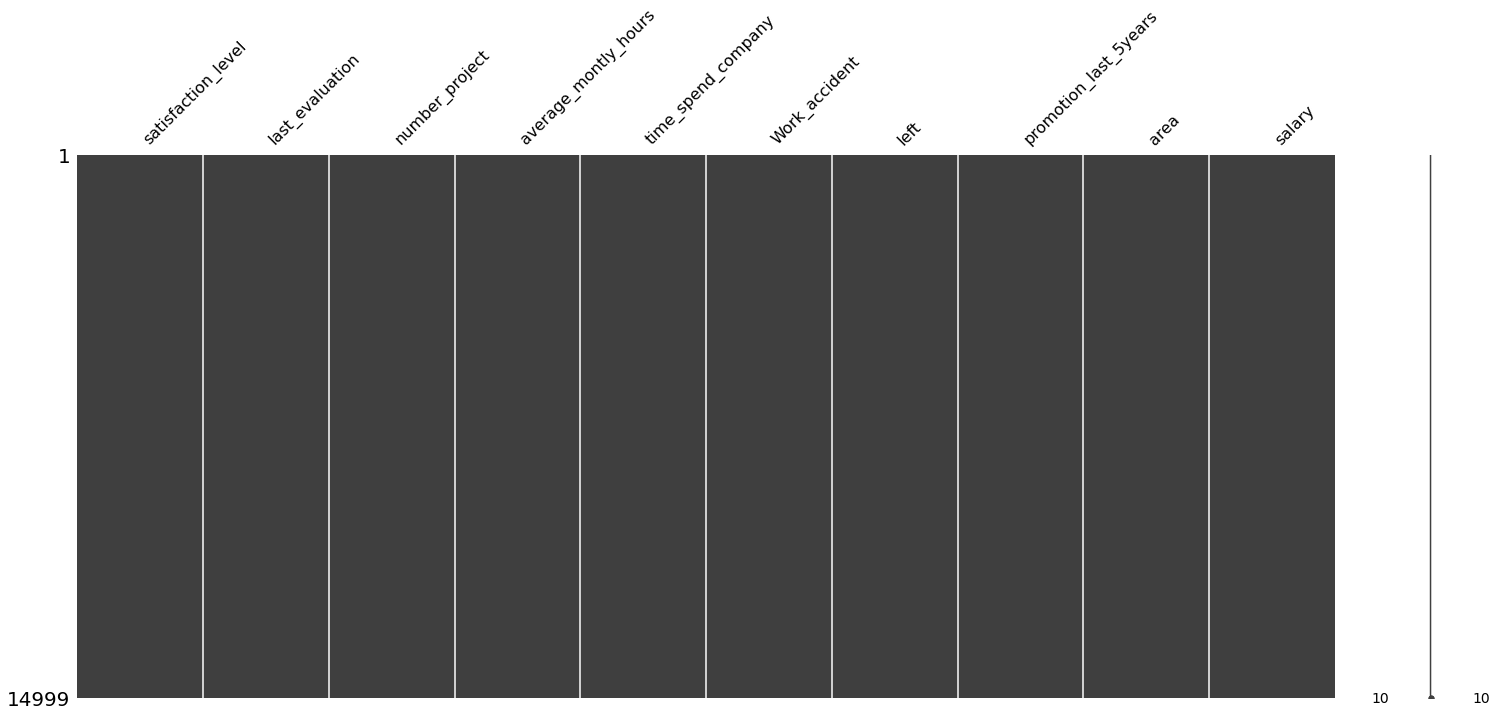

In [6]:
msno.matrix(df)

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df['left'].value_counts(1)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [9]:
df['area'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: area, dtype: int64

In [10]:
data=pd.get_dummies(data=df,columns=['area','salary'])

In [11]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,area_IT,area_RandD,area_accounting,area_hr,area_management,area_marketing,area_product_mng,area_sales,area_support,area_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [12]:
cols=[col for col in data.columns if col not in ['left','area_hr','salary_high']]

In [13]:
X=data[cols]
y=data['left']

In [14]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,area_IT,area_RandD,area_accounting,area_management,area_marketing,area_product_mng,area_sales,area_support,area_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [17]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,area_IT,area_RandD,area_accounting,area_management,area_marketing,area_product_mng,area_sales,area_support,area_technical,salary_low,salary_medium
2767,0.40,0.47,5,108,3,0,0,0,0,0,0,0,0,1,0,0,0,1
14574,0.72,0.96,5,267,5,0,0,0,0,0,0,0,0,0,0,1,1,0
11685,0.41,0.38,4,142,10,1,0,0,0,0,0,0,0,0,1,0,1,0
12890,0.63,0.55,4,200,3,1,0,0,1,0,0,0,0,0,0,0,1,0
12742,0.44,0.49,2,154,3,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.52,0.57,3,270,3,0,0,0,1,0,0,0,0,0,0,0,1,0
3264,0.59,0.79,4,209,2,0,0,0,0,0,0,0,0,0,0,1,0,1
9845,0.69,0.94,5,259,2,0,0,1,0,0,0,0,0,0,0,0,0,1
10799,0.78,0.59,5,236,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
y_train

2767     0
14574    1
11685    0
12890    0
12742    1
        ..
13123    0
3264     0
9845     0
10799    0
2732     0
Name: left, Length: 13499, dtype: int64

In [19]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,area_IT,area_RandD,area_accounting,area_management,area_marketing,area_product_mng,area_sales,area_support,area_technical,salary_low,salary_medium
1670,0.44,0.57,2,141,3,0,0,0,0,0,0,0,1,0,0,0,0,1
13378,0.55,0.96,3,194,3,0,0,0,0,0,0,0,1,0,0,0,0,1
10233,0.72,0.67,5,210,2,0,0,0,0,0,1,0,0,0,0,0,0,1
4719,0.96,0.75,4,177,2,0,0,1,0,0,0,0,0,0,0,0,1,0
7003,0.96,0.54,3,198,3,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.44,0.51,2,138,3,0,0,0,0,0,0,0,0,0,1,0,1,0
1427,0.57,0.61,4,158,5,0,0,0,0,0,0,0,0,0,1,0,0,1
8225,0.96,0.53,3,158,4,0,0,0,0,0,0,0,0,0,0,1,0,1
13287,0.59,0.48,3,197,3,0,0,0,0,0,0,0,1,0,0,0,0,1


In [20]:
y_test

1670     1
13378    0
10233    0
4719     0
7003     0
        ..
133      1
1427     1
8225     0
13287    0
3636     0
Name: left, Length: 1500, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logistic=LogisticRegression(solver='liblinear',penalty='l1')

In [23]:
logistic.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [24]:
logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
logistic.predict_proba(X_test)

array([[0.68967425, 0.31032575],
       [0.74328504, 0.25671496],
       [0.95347724, 0.04652276],
       ...,
       [0.9357392 , 0.0642608 ],
       [0.82191418, 0.17808582],
       [0.76677155, 0.23322845]])

In [26]:
logistic.predict_proba(X_test)[:,1]

array([0.31032575, 0.25671496, 0.04652276, ..., 0.0642608 , 0.17808582,
       0.23322845])

In [27]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [28]:
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [29]:
metricas(logistic,X_train,y_train)

 Roc Validate: 0.821
 Acc Validate: 0.792
 Matrix Conf Validate:  
 [[9567  720]
 [2082 1130]]


In [30]:
metricas(logistic,X_test,y_test)

 Roc Validate: 0.825
 Acc Validate: 0.794
 Matrix Conf Validate:  
 [[1059   82]
 [ 227  132]]


In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_pred=logistic.predict(X_test),y_true=y_test)

0.4607329842931937

In [33]:
f1_score(y_pred=logistic.predict(X_test),y_true=y_test,pos_label=0)

0.872682323856613

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,logistic.predict(X_test)))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1141
           1       0.62      0.37      0.46       359

    accuracy                           0.79      1500
   macro avg       0.72      0.65      0.67      1500
weighted avg       0.77      0.79      0.77      1500



In [36]:
from sklearn.metrics import roc_curve

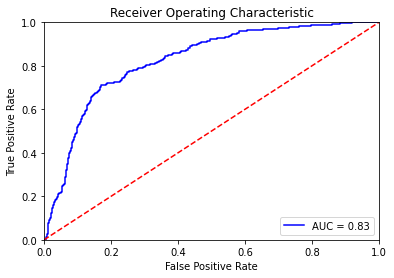

In [37]:
import matplotlib.pyplot as plt
fpr, tpr, thresh = roc_curve(y_test,logistic.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
from sklearn.metrics import plot_roc_curve

/Users/jesusarredondo/Documents/Diplomado/Modulo2/mod2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


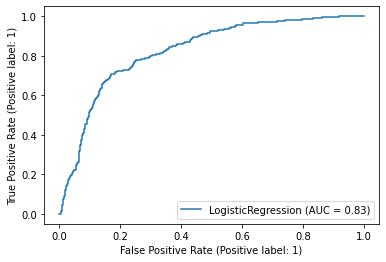

In [39]:
plot_roc_curve(logistic,X_test,y_test)